# Simulation of HPL on Dahu

In [1]:
import io
import zipfile
import pandas
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

def read_result(name):
    archive = zipfile.ZipFile(name)
    return pandas.read_csv(io.BytesIO(archive.read('results.csv')))

simulation_files_old = [
    'grenoble_2018-10-10_1811890.zip',
    'grenoble_2018-10-10_1811892.zip',
]
simulation_files = [
    'grenoble_2018-10-15_1812441.zip',
    'grenoble_2018-10-15_1812442.zip',
]
reality_files = [
    '../hpl/grenoble_2018-10-10_1811810.zip',
    '../hpl/grenoble_2018-10-10_1811847.zip',
]
dfsim = pandas.concat([read_result(f) for f in simulation_files])
dfsim_old = pandas.concat([read_result(f) for f in simulation_files_old])
dfreal = pandas.concat([read_result(f) for f in reality_files])
dfsim_old['mode'] = 'simulation:old'
dfsim['mode'] = 'simulation:shared_loopback'
dfreal['mode'] = 'reality'
df = pandas.concat([dfsim, dfsim_old, dfreal])
sizes = set(dfsim.matrix_size) & set(dfreal.matrix_size)
df = df[df.matrix_size.isin(sizes)]
df.head()

/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,application_time,bcast,block_size,cpu_utilization,depth,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept,gflops,...,proc_q,process_per_node,residual,rfact,simulation_time,swap,sys_time,thread_per_process,time,usr_time
0,98.3302,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,10960.0,...,32,32,NaN,2,992.818,0,59.82,1,25.66,930.84
1,271.8410,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,25070.0,...,32,32,NaN,2,2783.120,0,158.65,1,302.91,2617.87
2,127.4820,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,15280.0,...,32,32,NaN,2,1306.240,0,76.25,1,43.63,1226.93
3,145.9680,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,18610.0,...,32,32,NaN,2,1529.010,0,90.16,1,69.95,1435.29
4,189.0800,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,20870.0,...,32,32,NaN,2,1930.560,0,112.03,1,107.79,1814.06


### Checking the parameters

In [2]:
dfsim[['dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept']].drop_duplicates()

,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept
0,6.484604e-11,0.00024,8.021068e-11,6.929164e-07


In [3]:
dfsim_old[['dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept']].drop_duplicates()

,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept
0,6.484604e-11,0.00024,8.021068e-11,6.929164e-07


In [4]:
name_exceptions = {'application_time', 'simulation_time', 'usr_time', 'sys_time', 'time', 'gflops', 'residual', 'cpu_utilization',
                   'dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept',
                   'major_page_fault', 'minor_page_fault', 'matrix_size', 'mode'}
colnames = set(df) - name_exceptions
df[list(colnames)].drop_duplicates()

,mem_align,bcast,rfact,process_per_node,pfact,proc_q,swap,depth,proc_p,block_size,thread_per_process
0,8,2,2,32,1,32,0,1,32,128,1


In [5]:
platforms = [zipfile.ZipFile(f).read('dahu.xml').decode('ascii') for f in (simulation_files + simulation_files_old)]
assert(len(set(platforms))) == 1
print(platforms[0])

<?xml version="1.0"?>
<!DOCTYPE platform SYSTEM "http://simgrid.gforge.inria.fr/simgrid/simgrid.dtd">

<platform version="4.1">
    <config id="General">
        <prop id="smpi/os" value="0:2.9654918472829634e-07:9.636195922971908e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/or" value="0:1.3754300044375224e-06:8.456019002037343e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/ois" value="0:6.93122952108322e-07:7.051204536228499e-11;8133:3.601990790153314e-07:1.2449128895712003e-10;15831:2.977016881030904e-06:4.130261264964205e-11;33956:3.1334661540668004e-06:3.293458765282178e-11;63305:6.939993663604218e-07:0.0"/>
        <prop id="smpi/bw-factor" value="0:0.4709912642540426;8133:0.6770561715947873;15831:0.7091971477925826;33956:0.7033449540683548;63305:0.9867951082730284"/>
        <prop id="smpi/lat-factor" value="0:1.1347371681807956;8133:29.84698135078078;15831:30.274775156187765;33956:64.63917831305292;633

### Checking the patch in the new simulation

In [6]:
import yaml
repos = sum([yaml.load(zipfile.ZipFile(f).read('info.yaml').decode('ascii'))['git_repositories'] for f in simulation_files], [])
repos = [rep for rep in repos if 'simgrid' in rep['url']]
assert len(repos) == 2  # one per archive
patch = set(rep['patch'] for rep in repos)
assert len(patch) == 1  # same patch for both experiments
print(patch.pop())


diff --git a/src/surf/sg_platf.cpp b/src/surf/sg_platf.cpp
index f521fd925..fcb273088 100644
--- a/src/surf/sg_platf.cpp
+++ b/src/surf/sg_platf.cpp
@@ -220,7 +220,7 @@ void sg_platf_new_cluster(simgrid::kernel::routing::ClusterCreationArgs* cluster
       link.id        = tmp_link;
       link.bandwidth = cluster->loopback_bw;
       link.latency   = cluster->loopback_lat;
-      link.policy    = simgrid::s4u::Link::SharingPolicy::FATPIPE;
+      link.policy    = simgrid::s4u::Link::SharingPolicy::SHARED;
       sg_platf_new_link(&link);
       linkUp   = simgrid::s4u::Link::by_name_or_null(tmp_link);
       linkDown = simgrid::s4u::Link::by_name_or_null(tmp_link);



### Comparing the simulation with the real execution

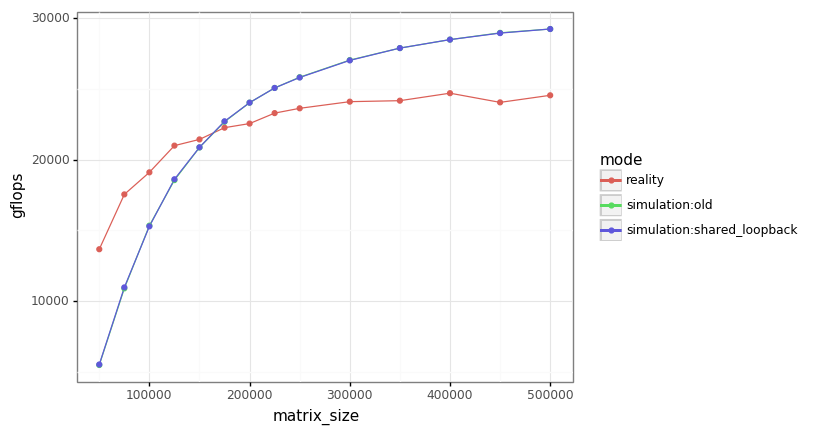

<ggplot: (8749665875797)>

In [7]:
ggplot(df, aes(x='matrix_size', y='gflops', color='mode')) + geom_line() + geom_point() + theme_bw()

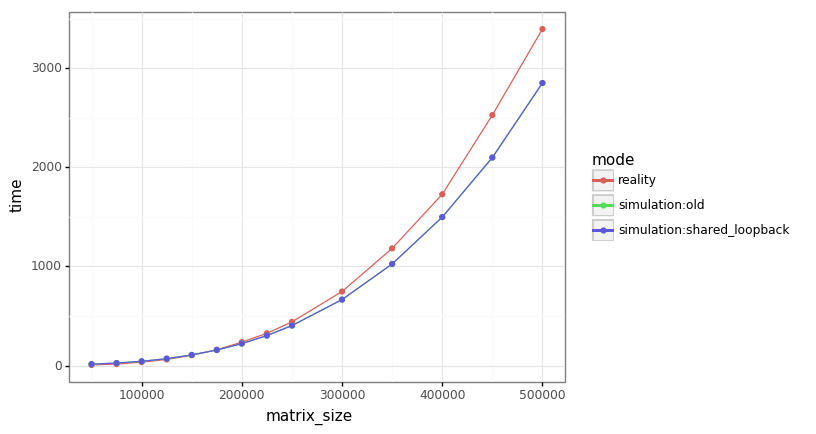

<ggplot: (-9223363287290598684)>

In [8]:
ggplot(df, aes(x='matrix_size', y='time', color='mode')) + geom_line() + geom_point() + theme_bw()

In [9]:
dfsim[dfsim.matrix_size == dfsim.matrix_size.max()][['matrix_size', 'gflops', 'time', 'simulation_time', 'mode']]

,matrix_size,gflops,time,simulation_time,mode
0,500000,29240.0,2849.88,5729.64,simulation:shared_loopback


In [10]:
dfsim_old[dfsim_old.matrix_size == dfsim_old.matrix_size.max()][['matrix_size', 'gflops', 'time', 'simulation_time', 'mode']]

,matrix_size,gflops,time,simulation_time,mode
0,500000,29240.0,2849.54,5786.9,simulation:old


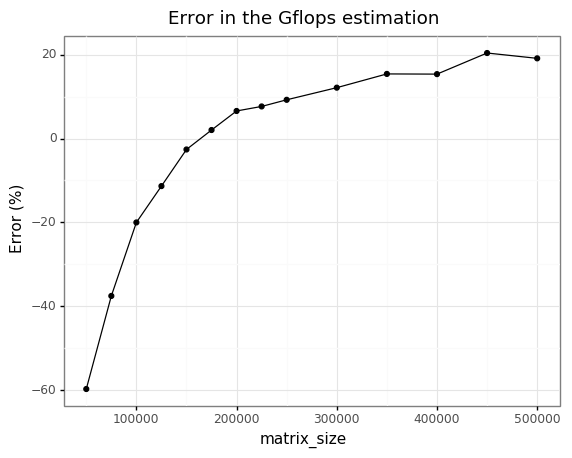

<ggplot: (-9223363287290743920)>

In [11]:
tmp = dfsim.set_index('matrix_size').join(dfreal.set_index('matrix_size'), rsuffix='_real').reset_index()
tmp['error'] = (tmp.gflops - tmp.gflops_real) / tmp.gflops_real * 100
tmp = tmp[~tmp.error.isna()]
ggplot(tmp, aes(x='matrix_size', y='error')) + geom_line() + geom_point() + ylab('Error (%)') + ggtitle('Error in the Gflops estimation') + theme_bw()

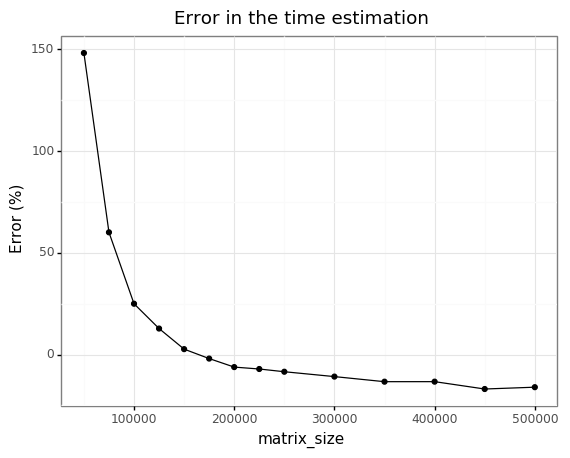

<ggplot: (8749564030521)>

In [12]:
tmp['error'] = (tmp.time - tmp.time_real) / tmp.time_real * 100
tmp = tmp[~tmp.error.isna()]
ggplot(tmp, aes(x='matrix_size', y='error')) + geom_line() + geom_point() + ylab('Error (%)') + ggtitle('Error in the time estimation') + theme_bw()

### Efficiency of the simulation

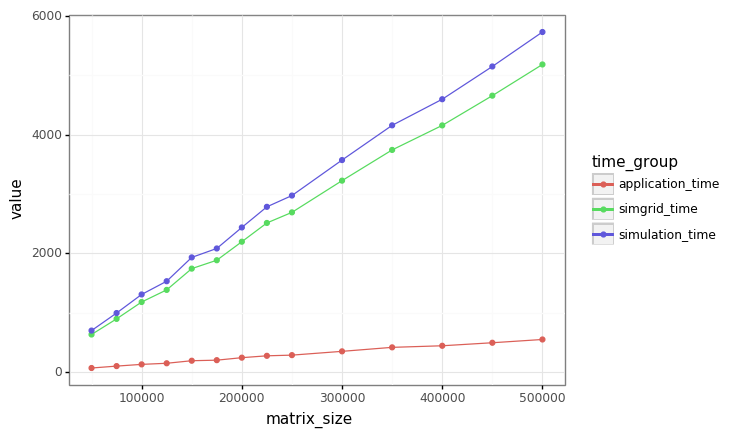

<ggplot: (-9223363287290745312)>


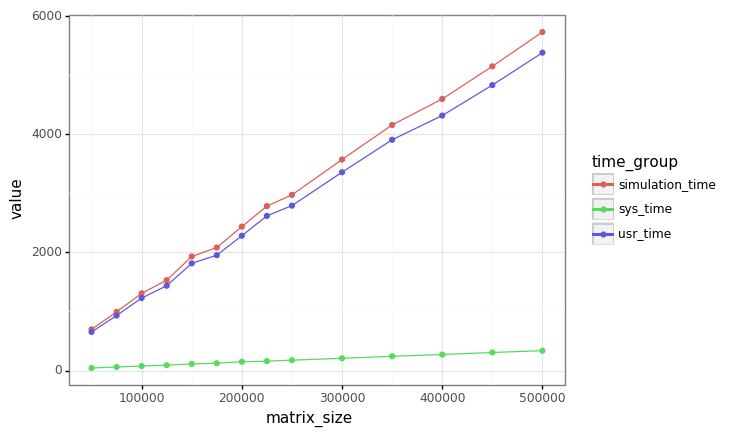

<ggplot: (-9223363287290745130)>

In [13]:
dfsim['simgrid_time'] = dfsim.simulation_time - dfsim.application_time

print(ggplot(dfsim.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'application_time', 'simgrid_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point() + theme_bw())

ggplot(dfsim.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'usr_time', 'sys_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point() + theme_bw()

### Maximum performance

In [14]:
dfsim[dfsim.gflops == dfsim.gflops.max()]

,application_time,bcast,block_size,cpu_utilization,depth,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept,gflops,...,process_per_node,rfact,simulation_time,swap,sys_time,thread_per_process,time,usr_time,mode,simgrid_time
0,547.007,2,128,0.99,1,6.484604e-11,0.00024,8.021068e-11,6.929164e-07,29240.0,...,32,2,5729.64,0,335.94,1,2849.88,5380.05,simulation:shared_loopback,5182.633


In [15]:
dfreal[dfreal.gflops == dfreal.gflops.max()]

,bcast,block_size,depth,gflops,matrix_size,mem_align,pfact,proc_p,proc_q,process_per_node,residual,rfact,swap,thread_per_process,time,mode
2,2,128,1,24700.0,400000,8,1,32,32,32,0.000531,2,0,1,1727.64,reality
